In [278]:
# Import package yang dibutuhkan
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

In [279]:
# Menampilkan data
df = pd.read_csv('data.csv', sep=';')

In [280]:
# Drop baris yang tidak diperlukan
df.drop(df[df['Target'] == 'Enrolled'].index, inplace = True)

In [281]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [282]:
df.shape

(3630, 37)

In [283]:
# Mengambil kolom yang relevan berdasarkan feature importance yang sudah dianalisis sebelumnya
df = df[['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Tuition fees up to date', 'Course', 'Age at enrollment', 'Scholarship holder', 'Gender', 'Marital status', 'Target']]

In [284]:
df.head()

,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Tuition fees up to date,Course,Age at enrollment,Scholarship holder,Gender,Marital status,Target
0,0,0,0.000000,0.000000,1,171,20,0,1,1,Dropout
1,6,6,14.000000,13.666667,0,9254,19,0,1,1,Graduate
2,0,0,0.000000,0.000000,0,9070,19,0,1,1,Dropout
3,6,5,13.428571,12.400000,1,9773,20,0,0,1,Graduate
4,5,6,12.333333,13.000000,1,8014,45,0,0,2,Graduate


In [285]:
df.isnull().sum()

Curricular units 1st sem (approved)    0
Curricular units 2nd sem (approved)    0
Curricular units 1st sem (grade)       0
Curricular units 2nd sem (grade)       0
Tuition fees up to date                0
Course                                 0
Age at enrollment                      0
Scholarship holder                     0
Gender                                 0
Marital status                         0
Target                                 0
dtype: int64

In [286]:
# # Label encoding untuk kolom course
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['Course'] = le.fit_transform(df['Course'])

In [287]:
# Memisahkan fitur dan target
X = df.drop('Target', axis=1)
y = df['Target']

In [288]:
# # Standardisasi data
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))

In [289]:
# Memecah data menjadi set train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [290]:
nama_model_sentiment = []
scoreTrainArr = []
scoreTestArr = []
precisionArr = []
recallArr = []
f1Arr = []

# Fungsi untuk melatih model dan mengevaluasi performanya
def pred_model(model, X_train, y_train, X_test, y_test, nama_model):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    scoreTrain = accuracy_score(y_train, y_pred_train)
    scoreTest = accuracy_score(y_test, y_pred_test)
    
    nama_model_sentiment.append(nama_model)
    scoreTrainArr.append(scoreTrain)
    scoreTestArr.append(scoreTest)
    
    print("=====================================================")
    print("Evaluasi Akurasi Model:")
    print("Training Accuracy :", scoreTrain)
    print("Testing Accuracy :", scoreTest)
    
    print("=====================================================")
    
    print("\nClassification report untuk data test:")
    cr = classification_report(y_test, y_pred_test)
    print(cr)

    cr2 = classification_report(y_test, y_pred_test, output_dict=True)
    precisionArr.append(cr2['macro avg']['precision'])
    recallArr.append(cr2['macro avg']['recall'])
    f1Arr.append(cr2['macro avg']['f1-score'])
    
    print("=====================================================")
    
    confusion_matrix_percent = confusion_matrix(y_test, y_pred_test)
    confusion_matrix_df = pd.DataFrame(confusion_matrix_percent, index=model.classes_, columns=model.classes_)

    plt.figure()
    heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='.0f', cmap='YlGnBu')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0,  fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0,  fontsize=14)

    plt.title('Confusion Matrix untuk Data Test', fontsize=18, color='darkblue')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.show()

In [291]:
# Fitting model
clf_logreg = LogisticRegression(random_state=42).fit(X_train, y_train)
clf_svm = SVC(kernel='linear', random_state=42).fit(X_train, y_train)
clf_dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf_rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
clf_catboost = CatBoostClassifier(random_state=42, verbose=0).fit(X_train, y_train)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluasi Akurasi Model:
Training Accuracy : 0.8887741046831956
Testing Accuracy : 0.8829201101928374

Classification report untuk data test:
              precision    recall  f1-score   support

     Dropout       0.88      0.80      0.84       277
    Graduate       0.88      0.94      0.91       449

    accuracy                           0.88       726
   macro avg       0.88      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726



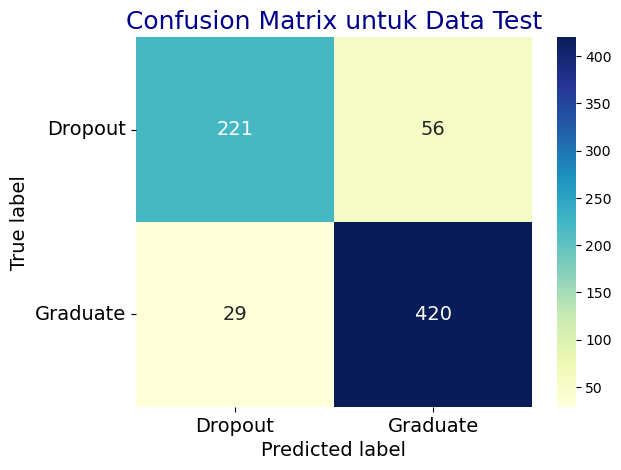

In [292]:
pred_model(clf_logreg, X_train, y_train, X_test, y_test, 'Logistic Regression')

Evaluasi Akurasi Model:
Training Accuracy : 0.8860192837465565
Testing Accuracy : 0.8842975206611571

Classification report untuk data test:
              precision    recall  f1-score   support

     Dropout       0.93      0.75      0.83       277
    Graduate       0.86      0.97      0.91       449

    accuracy                           0.88       726
   macro avg       0.90      0.86      0.87       726
weighted avg       0.89      0.88      0.88       726



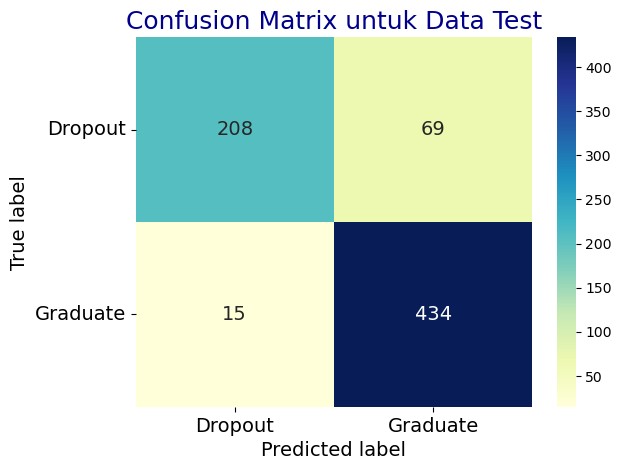

In [293]:
pred_model(clf_svm, X_train, y_train, X_test, y_test, 'SVM')

Evaluasi Akurasi Model:
Training Accuracy : 0.9886363636363636
Testing Accuracy : 0.8402203856749312

Classification report untuk data test:
              precision    recall  f1-score   support

     Dropout       0.78      0.82      0.80       277
    Graduate       0.88      0.86      0.87       449

    accuracy                           0.84       726
   macro avg       0.83      0.84      0.83       726
weighted avg       0.84      0.84      0.84       726



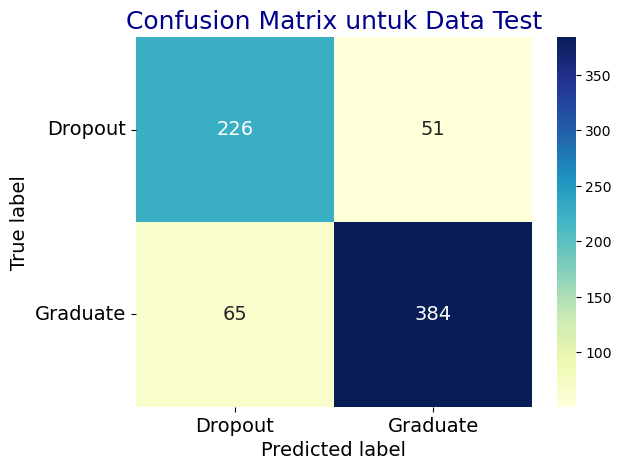

In [294]:
pred_model(clf_dt, X_train, y_train, X_test, y_test, 'Decision Tree')

Evaluasi Akurasi Model:
Training Accuracy : 0.9886363636363636
Testing Accuracy : 0.8911845730027548

Classification report untuk data test:
              precision    recall  f1-score   support

     Dropout       0.90      0.81      0.85       277
    Graduate       0.89      0.94      0.91       449

    accuracy                           0.89       726
   macro avg       0.89      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



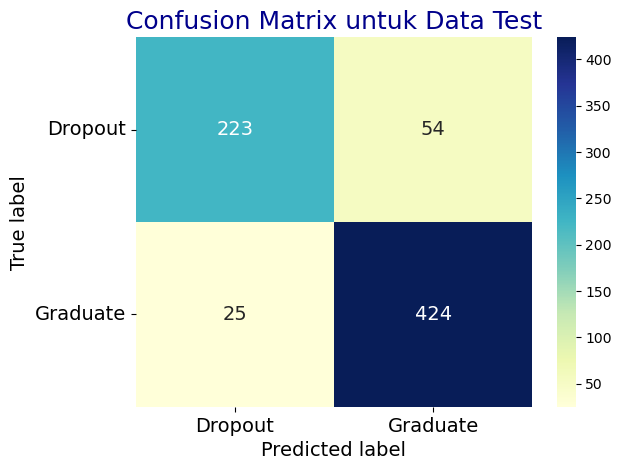

In [295]:
pred_model(clf_rf, X_train, y_train, X_test, y_test, 'Random Forest')

Evaluasi Akurasi Model:
Training Accuracy : 0.946969696969697
Testing Accuracy : 0.8980716253443526

Classification report untuk data test:
              precision    recall  f1-score   support

     Dropout       0.92      0.80      0.86       277
    Graduate       0.89      0.96      0.92       449

    accuracy                           0.90       726
   macro avg       0.90      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



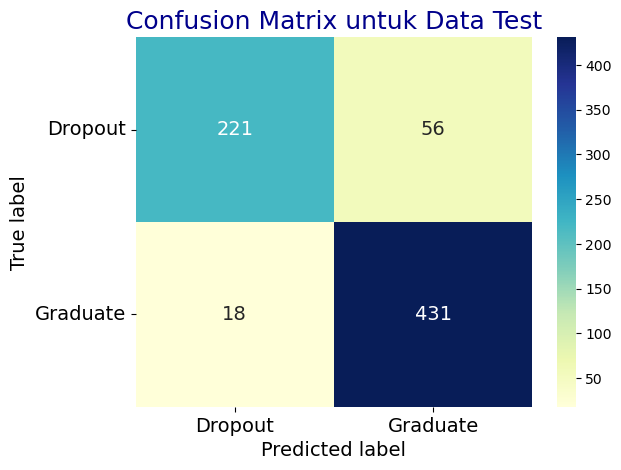

In [296]:
pred_model(clf_catboost, X_train, y_train, X_test, y_test, 'CatBoost')

Fitting 3 folds for each of 36 candidates, totalling 108 fits


c:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters from Grid Search: {'depth': 4, 'iterations': 100, 'learning_rate': 0.2}
Evaluasi Akurasi Model:
Training Accuracy : 0.9152892561983471
Testing Accuracy : 0.9022038567493113

Classification report untuk data test:
              precision    recall  f1-score   support

     Dropout       0.93      0.81      0.86       277
    Graduate       0.89      0.96      0.92       449

    accuracy                           0.90       726
   macro avg       0.91      0.88      0.89       726
weighted avg       0.90      0.90      0.90       726



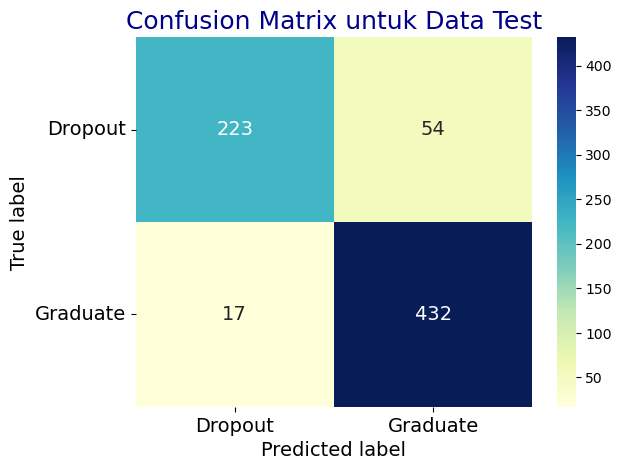

In [297]:
# Hyperparameter Tuning Grid Search untuk Catboost Classifier

clf_catboost_grid = CatBoostClassifier(random_state=42, verbose=0)

param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.2, 0.1, 0.01, 0.001],
    'iterations': [100, 200, 300],
}

grid_search = GridSearchCV(estimator=clf_catboost_grid, param_grid=param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters from Grid Search:", best_params)

clf_catboost_best = CatBoostClassifier(**best_params, random_state=42, verbose=0).fit(X_train, y_train)
pred_model(clf_catboost_best, X_train, y_train, X_test, y_test, 'CatBoost (Best Params)')

In [298]:
df_result_score = pd.DataFrame({
    'Model': nama_model_sentiment,
    'Train Score': scoreTrainArr,
    'Test Score': scoreTestArr,
    'Precision': precisionArr,
    'Recall': recallArr,
    'F1 Score': f1Arr
})

In [299]:
df_result_score = df_result_score.sort_values(by='F1 Score', ascending=False)
df_result_score

,Model,Train Score,Test Score,Precision,Recall,F1 Score
5,CatBoost (Best Params),0.915289,0.902204,0.909028,0.883596,0.893367
4,CatBoost,0.946970,0.898072,0.904848,0.878872,0.888765
3,Random Forest,0.988636,0.891185,0.893111,0.874687,0.882151
0,Logistic Regression,0.888774,0.882920,0.883176,0.866623,0.873409
1,SVM,0.886019,0.884298,0.897779,0.858747,0.871882
2,Decision Tree,0.988636,0.840220,0.829695,0.835559,0.832276


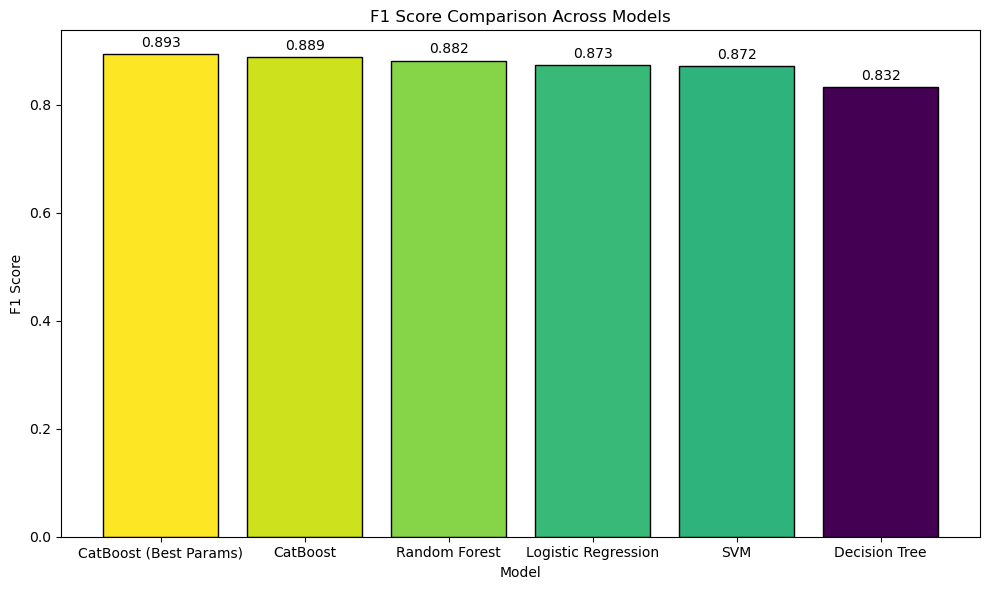

In [ ]:
norm = plt.Normalize(df_result_score['F1 Score'].min(), df_result_score['F1 Score'].max())
colors = plt.cm.viridis(norm(df_result_score['F1 Score'].values))

plt.figure(figsize=(10, 6))
bars = plt.bar(df_result_score['Model'], df_result_score['F1 Score'], edgecolor='black', color=colors)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), 
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison Across Models')
plt.tight_layout()
plt.show()

In [ ]:
# Menyimpan model
import pickle

with open('models/catboost_best_model.pkl', 'wb') as f:
    pickle.dump(clf_catboost_best, f)